## Clustering

In [49]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# import clustering algs
from sklearn.cluster import KMeans, DBSCAN

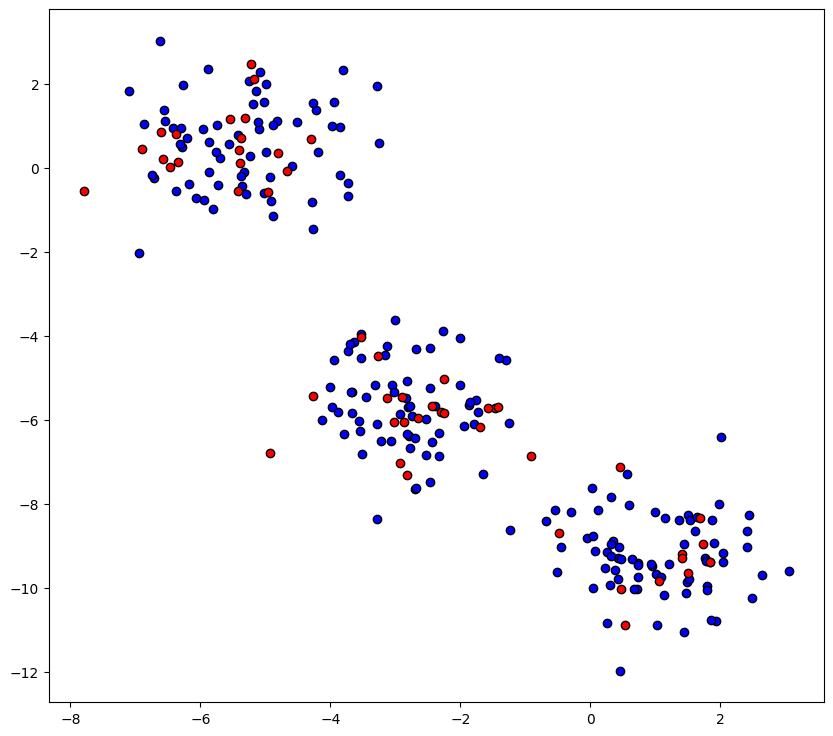

In [50]:
 X , y = make_blobs(n_samples = 250, n_features = 2, random_state= 16) #, centers = clusters

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

_, ax = plt.subplots(figsize = (10,9))
ax.scatter( X_train [:, 0], X_train [:, 1], edgecolors='k', c='b')
ax.scatter( X_test [:, 0], X_test [:, 1], edgecolors='k', c='r')
plt.show()

In [51]:
# import decision boundaries function


[KMeans(n_clusters=3), DBSCAN(eps=1.6, min_samples=20), KMeans(n_clusters=7), DBSCAN(eps=1.6, min_samples=20)]


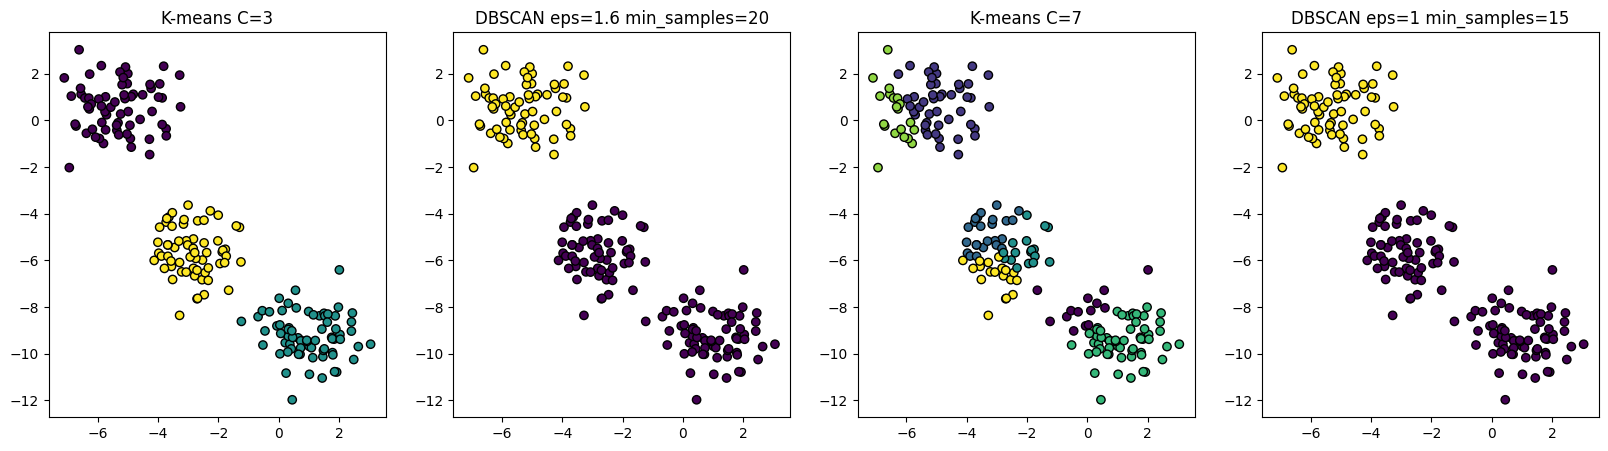

In [52]:
# Create varibles to esp and min_samples calculated


models = [ KMeans(n_clusters=3) , DBSCAN(eps=1.6, min_samples= 20),
          KMeans(n_clusters=7) , DBSCAN(eps=1.6, min_samples= 20)]
names = ['K-means C=3', 'DBSCAN eps=1.6 min_samples=20',
          'K-means C=7', 'DBSCAN eps=1 min_samples=15']

print(models)

_, axes = plt.subplots(1, 4, figsize = (20,5))
preds = {}

# fit the model
for i, (model, name, ax) in enumerate( zip(models, names, axes) ) :
    # Instance and train

    # Predictions on train and test sets
    if name.startswith('DBSCAN'):
      model.fit(X_train)
      preds[name] = model.labels_
    else:
      model.fit(X_test)
      preds[name] = model.predict(X_train)

    # Plot everything
    ax.scatter( X_train [:, 0], X_train [:, 1], c=preds[name], edgecolors='k')
    ax.set_title(name)

plt.show()

## Metrics

The metrics module [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn

In [59]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

In [60]:
## Scores for training data

for name in names:
  print ("########----- Results for {0} -----########".format( name ))
  ari = adjusted_rand_score( y_train , preds[name] )
  ami = adjusted_mutual_info_score( y_train , preds[name] )
  sil = silhouette_score( X_train , preds[name] )
  ##--------------
  print("-- ARI --\t -- AMI --\t SIL --")
  print("  {0:.3f}  \t   {1:.3f}  \t   {2:.3f}  \t".format(ari, ami, sil))

########----- Results for K-means C=3 -----########
-- ARI --	 -- AMI --	 SIL --
  1.000  	   1.000  	   0.698  	
########----- Results for DBSCAN eps=1.6 min_samples=20 -----########
-- ARI --	 -- AMI --	 SIL --
  0.562  	   0.728  	   0.657  	
########----- Results for K-means C=7 -----########
-- ARI --	 -- AMI --	 SIL --
  0.614  	   0.736  	   0.316  	
########----- Results for DBSCAN eps=1 min_samples=15 -----########
-- ARI --	 -- AMI --	 SIL --
  0.562  	   0.728  	   0.657  	


In [61]:
## Scores for test data

for i, key in enumerate(predsT.keys()):
  print ("########----- Results for {0} -----########".format( _ ))
  ari = adjusted_rand_score( _ , _ )
  ami = adjusted_mutual_info_score( _ , _ )
  ##--------------
  print("-- ARI --\t -- AMI --\t --")
  print("  {0:.3f}  \t   {1:.3f}  \t   {2:.3f}  \t".format(ari, ami))

########----- Results for K-means C=3 -----########


ValueError: Found input variables with inconsistent numbers of samples: [50, 200]

## In real data

In [ ]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()
images = (digits.images > 6) * 1.0

_, axes = plt.subplots(1,10, figsize=(20,4))
for i, ax in enumerate(axes):
  ax.imshow(images[i].reshape(8,8), cmap="gray")

plt.show()